This code is forked from a project by Alice Zhao, which is available here: 
https://github.com/adashofdata/nlp-in-python-tutorial
Let's get started!  Here, we are using the import keyword to access different modules, so we can implement functionality immediately.

In [10]:
import requests
import nltk
import pickle

The first thing we want to do when analyzing text data is to actually get the text we want, and print some output to make sure we are achieving the desired result.
Below, we are greating a variable called oliver_twist_full_text and assigning it, using "=", to the contents of the url (in parenthesis) using the get function from the requests library, and outputting it as a text file using the .text function.  Then, we are using the print function to display the entire text that we requested from the project gutenberg website.

In [6]:
# oliver_twist_full_text = requests.get(http://www.gutenberg.org/files/47529/47529-0.txt).text
# print(oliver_twist_full_text)

﻿The Project Gutenberg EBook of Oliver Twist, by Charles Dickens

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: Oliver Twist

Author: Charles Dickens

Posting Date: October 10, 2008 [EBook #730]
Release Date: November, 1996

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK OLIVER TWIST ***




Produced by Peggy Gaugy and Leigh Little.  HTML version by Al Haines.









OLIVER TWIST

OR

THE PARISH BOY'S PROGRESS


BY

CHARLES DICKENS




CONTENTS

       I  TREATS OF THE PLACE WHERE OLIVER TWIST WAS BORN AND OF THE
          CIRCUMSTANCES ATTENDING HIS BIRTH
      II  TREATS OF OLIVER TWIST'S GROWTH, EDUCATION, AND BOARD
     III  RELATES HOW OLIVER TWIST WAS VERY NEAR GETTING A PLACE WHICH
          WOULD NOT HAVE BEEN A SINECURE
      IV  OLIVER, BEING OFFERED 

We need additional texts to compare, so let's grab a few more using the same format, but with updated variable names and urls.

In [7]:
# pride_and_prejudice_full_text = requests.get('http://www.gutenberg.org/files/1342/1342-0.txt').text

In [8]:
# middlemarch_full_text = requests.get('http://www.gutenberg.org/cache/epub/145/pg145.txt').text

In [9]:
# voyage_out_full_text = requests.get('http://www.gutenberg.org/files/144/144-0.txt').text
# jane_eyre_full_text = requests.get('http://www.gutenberg.org/cache/epub/1260/pg1260.txt').text

In [15]:
def book_to_text(url):
    '''Returns text data specifically from project gutenburg **remember that you have a daily limit on downloads!'''
    page = requests.get(url).text
    return page


# URLs of texts in scope
urls = ['http://www.gutenberg.org/files/1400/1400-0.txt',
        'http://www.gutenberg.org/cache/epub/21839/pg21839.txt',
        'http://www.gutenberg.org/files/6688/6688-0.txt',
        'http://www.gutenberg.org/files/1245/1245-0.txt',
        'http://www.gutenberg.org/cache/epub/768/pg768.txt']

# author last names
authors = ['dickens', 'austen', 'eliot', 'woolfe', 'bronte']

In [16]:
# Actually request books by executing the function (may take a while!)
# books = [book_to_text(u) for u in urls]

In [18]:
# # Pickle files for later use

# # Make a new directory to hold the text files
# !mkdir books

# for i, c in enumerate(authors):
#    with open("books/" + c + ".txt", "wb") as file:
#        pickle.dump(books[i], file)

In [19]:
# Load pickled files
data = {}
for i, c in enumerate(authors):
    with open("books/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [20]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['dickens', 'austen', 'eliot', 'woolfe', 'bronte'])

In [21]:
# Let's take a look at our data again
next(iter(data.keys()))

'dickens'

In [22]:
# Notice that our dictionary is currently in key: author, value: list of text format
next(iter(data.values()))

"ï»¿The Project Gutenberg EBook of Great Expectations, by Charles Dickens\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: Great Expectations\r\n\r\nAuthor: Charles Dickens\r\n\r\nPosting Date: August 20, 2008 [EBook #1400]\r\nRelease Date: July, 1998\r\nLast Updated: March 4, 2018\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK GREAT EXPECTATIONS ***\r\n\r\n\r\n\r\n\r\nProduced by An Anonymous Volunteer\r\n\r\n\r\n\r\n\r\n\r\nGREAT EXPECTATIONS\r\n\r\n[1867 Edition]\r\n\r\nby Charles Dickens\r\n\r\n\r\n[Project Gutenberg Editor's Note: There is also another version of\r\nthis work etext98/grexp10.txt scanned from a different edition]\r\n\r\n\r\n\r\n\r\nChapter I\r\n\r\nMy father's family name 

In [47]:
# We are going to change this to key: author, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ''.join(list_of_text)
    return combined_text

In [48]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [49]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['books']
data_df = data_df.sort_index()
data_df

,books
austen,"﻿The Project Gutenberg EBook of Sense and Sensibility, by Jane Austen\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\na..."
bronte,"﻿The Project Gutenberg eBook, Wuthering Heights, by Emily Bronte\r\n\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nal..."
dickens,"ï»¿The Project Gutenberg EBook of Great Expectations, by Charles Dickens\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r..."
eliot,"\r\nThe Project Gutenberg EBook of The Mill on the Floss, by George Eliot\r\n\r\nThis eBook is for the use of anyone anywhere in the United States..."
woolfe,"ï»¿The Project Gutenberg EBook of Night and Day, by Virginia Woolf\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmo..."


In [50]:
# Let's take a look at the text of Night and Day
data_df.books.loc['woolfe']

'ï»¿The Project Gutenberg EBook of Night and Day, by Virginia Woolf\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: Night and Day\r\n\r\nAuthor: Virginia Woolf\r\n\r\nPosting Date: August 26, 2008 [EBook #1245]\r\nRelease Date: March, 1998\r\nLast Updated: November 20, 2016\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK NIGHT AND DAY ***\r\n\r\n\r\n\r\n\r\nProduced by Judy Boss\r\n\r\n\r\n\r\n\r\n\r\nNIGHT AND DAY\r\n\r\nBy Virginia Woolf\r\n\r\n\r\n\r\n               TO\r\n               VANESSA BELL\r\n               BUT, LOOKING FOR A PHRASE,\r\n               I FOUND NONE TO STAND\r\n               BESIDE YOUR NAME\r\n\r\n\r\n\r\n\r\n\r\nNIGHT AND DAY\r\n\r\n\r\n\r\nCHAPTER I\r\n\r\nIt wa

In [51]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [52]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.books.apply(round1))
data_clean

,books
austen,﻿the project gutenberg ebook of sense and sensibility by jane austen\r\n\r\nthis ebook is for the use of anyone anywhere at no cost and with\r\nal...
bronte,﻿the project gutenberg ebook wuthering heights by emily bronte\r\n\r\n\r\nthis ebook is for the use of anyone anywhere at no cost and with\r\nalmo...
dickens,ï»¿the project gutenberg ebook of great expectations by charles dickens\r\n\r\nthis ebook is for the use of anyone anywhere at no cost and with\r\...
eliot,\r\nthe project gutenberg ebook of the mill on the floss by george eliot\r\n\r\nthis ebook is for the use of anyone anywhere in the united states ...
woolfe,ï»¿the project gutenberg ebook of night and day by virginia woolf\r\n\r\nthis ebook is for the use of anyone anywhere at no cost and with\r\nalmos...


In [86]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('\n', ' ', text)
    text = re.sub('\r', ' ', text)
    text = re.sub('¿', '', text)
    text = re.sub('ï', '', text)
    text = re.sub('»', '', text)
    text = re.sub('â', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [87]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.books.apply(round2))
data_clean

,books
austen,﻿the project gutenberg ebook of sense and sensibility by jane austenthis ebook is for the use of anyone anywhere at no cost and withalmost no rest...
bronte,﻿the project gutenberg ebook wuthering heights by emily brontethis ebook is for the use of anyone anywhere at no cost and withalmost no restrictio...
dickens,the project gutenberg ebook of great expectations by charles dickensthis ebook is for the use of anyone anywhere at no cost and withalmost no rest...
eliot,the project gutenberg ebook of the mill on the floss by george eliotthis ebook is for the use of anyone anywhere in the united states and mostothe...
woolfe,the project gutenberg ebook of night and day by virginia woolfthis ebook is for the use of anyone anywhere at no cost and withalmost no restrictio...


CountVectorizer is a module from the scikit-learn library that allows us to tokenize the text by separating each word into an element in an array.  Every row in the array represents an author, and every column represents a word.

There is also a function in CountVectorizer that removes stop words, which are common English words that don't change the meaning, like 'the'

In [88]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.books)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,aaron,ababybut,aback,abackto,abad,abandon,abandoned,abandonedhis,abandoning,abandonment,...,zillah,zillahand,zillahno,zillahs,zillahsplace,zillahurging,zoo,zoological,éclat,î¹î¼îµî³îµî
austen,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
bronte,0,0,0,0,0,1,2,1,0,1,...,29,1,1,1,1,1,0,0,0,0
dickens,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
eliot,1,0,0,0,0,2,0,0,1,2,...,0,0,0,0,0,0,0,0,0,1
woolfe,0,1,5,0,0,0,0,0,0,2,...,0,0,0,0,0,0,4,1,0,0


In [89]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [102]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('corpus.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [91]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,austen,bronte,dickens,eliot,woolfe
aaron,0,0,0,1,0
ababybut,0,0,0,0,1
aback,0,0,0,0,5
abackto,0,0,1,0,0
abad,0,0,1,0,0


In [92]:
# Find the top 30 words in each novel
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'austen': [('elinor', 418),
  ('mrs', 394),
  ('marianne', 357),
  ('said', 348),
  ('did', 220),
  ('time', 214),
  ('know', 200),
  ('dashwood', 189),
  ('miss', 183),
  ('think', 182),
  ('sister', 175),
  ('jennings', 163),
  ('edward', 163),
  ('thing', 157),
  ('soon', 156),
  ('mother', 156),
  ('mr', 149),
  ('say', 136),
  ('little', 133),
  ('willoughby', 132),
  ('lucy', 132),
  ('john', 131),
  ('great', 128),
  ('make', 124),
  ('house', 120),
  ('good', 116),
  ('day', 116),
  ('colonel', 116),
  ('sure', 115),
  ('lady', 110)],
 'bronte': [('said', 321),
  ('heathcliff', 299),
  ('linton', 267),
  ('catherine', 255),
  ('mr', 230),
  ('did', 210),
  ('ill', 178),
  ('shall', 177),
  ('come', 157),
  ('little', 154),
  ('dont', 149),
  ('master', 148),
  ('im', 146),
  ('like', 138),
  ('answered', 126),
  ('hareton', 123),
  ('till', 122),
  ('let', 118),
  ('house', 110),
  ('tell', 110),
  ('thought', 107),
  ('mrs', 106),
  ('cried', 105),
  ('know', 104),
  ('time',

In [93]:
# Print the top 15 words in each novel
for author, top_words in top_dict.items():
    print(author)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

austen
elinor, mrs, marianne, said, did, time, know, dashwood, miss, think, sister, jennings, edward, thing
---
bronte
said, heathcliff, linton, catherine, mr, did, ill, shall, come, little, dont, master, im, like
---
dickens
said, mr, joe, know, miss, come, time, little, pip, looked, say, did, like, man
---
eliot
said, maggie, tom, mr, tulliver, like, mrs, come, philip, father, know, ll, little, glegg
---
woolfe
katharine, said, mary, ralph, denham, mrs, hilbery, little, don, time, did, thought, mr, cassandra
---


In [94]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for author in data.columns:
    top = [word for (word, count) in top_dict[author]]
    for t in top:
        words.append(t)
        
words

['elinor',
 'mrs',
 'marianne',
 'said',
 'did',
 'time',
 'know',
 'dashwood',
 'miss',
 'think',
 'sister',
 'jennings',
 'edward',
 'thing',
 'soon',
 'mother',
 'mr',
 'say',
 'little',
 'willoughby',
 'lucy',
 'john',
 'great',
 'make',
 'house',
 'good',
 'day',
 'colonel',
 'sure',
 'lady',
 'said',
 'heathcliff',
 'linton',
 'catherine',
 'mr',
 'did',
 'ill',
 'shall',
 'come',
 'little',
 'dont',
 'master',
 'im',
 'like',
 'answered',
 'hareton',
 'till',
 'let',
 'house',
 'tell',
 'thought',
 'mrs',
 'cried',
 'know',
 'time',
 'miss',
 'think',
 'replied',
 'door',
 'make',
 'said',
 'mr',
 'joe',
 'know',
 'miss',
 'come',
 'time',
 'little',
 'pip',
 'looked',
 'say',
 'did',
 'like',
 'man',
 'old',
 'went',
 'herbert',
 'dont',
 'way',
 'hand',
 'wemmick',
 'think',
 'took',
 'havisham',
 'got',
 'going',
 'saw',
 'thought',
 'came',
 'estella',
 'said',
 'maggie',
 'tom',
 'mr',
 'tulliver',
 'like',
 'mrs',
 'come',
 'philip',
 'father',
 'know',
 'll',
 'little',
 

In [95]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('said', 5),
 ('did', 5),
 ('know', 5),
 ('think', 5),
 ('mr', 5),
 ('little', 5),
 ('mrs', 4),
 ('time', 4),
 ('say', 4),
 ('come', 4),
 ('thought', 4),
 ('miss', 3),
 ('make', 3),
 ('like', 3),
 ('way', 3),
 ('lucy', 2),
 ('house', 2),
 ('good', 2),
 ('dont', 2),
 ('looked', 2),
 ('man', 2),
 ('got', 2),
 ('don', 2),
 ('ve', 2),
 ('mind', 2),
 ('life', 2),
 ('elinor', 1),
 ('marianne', 1),
 ('dashwood', 1),
 ('sister', 1),
 ('jennings', 1),
 ('edward', 1),
 ('thing', 1),
 ('soon', 1),
 ('mother', 1),
 ('willoughby', 1),
 ('john', 1),
 ('great', 1),
 ('day', 1),
 ('colonel', 1),
 ('sure', 1),
 ('lady', 1),
 ('heathcliff', 1),
 ('linton', 1),
 ('catherine', 1),
 ('ill', 1),
 ('shall', 1),
 ('master', 1),
 ('im', 1),
 ('answered', 1),
 ('hareton', 1),
 ('till', 1),
 ('let', 1),
 ('tell', 1),
 ('cried', 1),
 ('replied', 1),
 ('door', 1),
 ('joe', 1),
 ('pip', 1),
 ('old', 1),
 ('went', 1),
 ('herbert', 1),
 ('hand', 1),
 ('wemmick', 1),
 ('took', 1),
 ('havisham', 1),
 ('going', 1),
 ('

In [96]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

[]

In [97]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.books)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [98]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

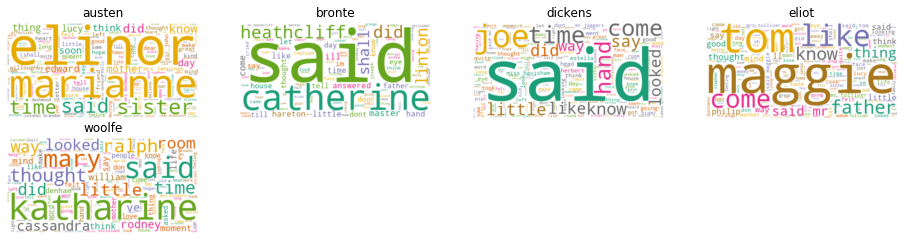

In [99]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

authors = ['austen', 'bronte', 'dickens', 'eliot', 'woolfe']

# Create subplots for each author
for index, author in enumerate(data.columns):
    wc.generate(data_clean.books[author])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(authors[index])
    
plt.show()

In [100]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for author in data.columns:
    uniques = data[author].nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(authors, unique_list)), columns=['author', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

/home/julia/dev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  


,author,unique_words
0,austen,15454
1,bronte,17566
4,woolfe,19976
2,dickens,21040
3,eliot,23241


In [103]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,books
austen,﻿the project gutenberg ebook of sense and sensibility by jane austenthis ebook is for the use of anyone anywhere at no cost and withalmost no rest...
bronte,﻿the project gutenberg ebook wuthering heights by emily brontethis ebook is for the use of anyone anywhere at no cost and withalmost no restrictio...
dickens,the project gutenberg ebook of great expectations by charles dickensthis ebook is for the use of anyone anywhere at no cost and withalmost no rest...
eliot,the project gutenberg ebook of the mill on the floss by george eliotthis ebook is for the use of anyone anywhere in the united states and mostothe...
woolfe,the project gutenberg ebook of night and day by virginia woolfthis ebook is for the use of anyone anywhere at no cost and withalmost no restrictio...


In [104]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['books'].apply(pol)
data['subjectivity'] = data['books'].apply(sub)
data

,books,polarity,subjectivity
austen,﻿the project gutenberg ebook of sense and sensibility by jane austenthis ebook is for the use of anyone anywhere at no cost and withalmost no rest...,0.133955,0.528302
bronte,﻿the project gutenberg ebook wuthering heights by emily brontethis ebook is for the use of anyone anywhere at no cost and withalmost no restrictio...,0.038887,0.515839
dickens,the project gutenberg ebook of great expectations by charles dickensthis ebook is for the use of anyone anywhere at no cost and withalmost no rest...,0.075127,0.485456
eliot,the project gutenberg ebook of the mill on the floss by george eliotthis ebook is for the use of anyone anywhere in the united states and mostothe...,0.089265,0.507043
woolfe,the project gutenberg ebook of night and day by virginia woolfthis ebook is for the use of anyone anywhere at no cost and withalmost no restrictio...,0.101898,0.498058


KeyError: 'authors'

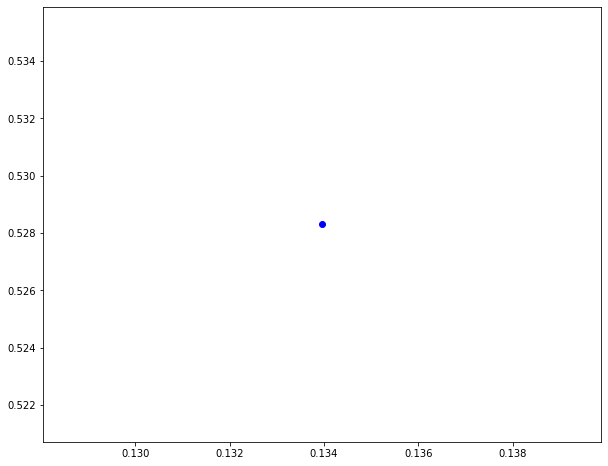

In [109]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, author in enumerate(data.index):
    x = data.polarity.loc[author]
    y = data.subjectivity.loc[author]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['authors'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()